In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
import re
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from statistics import mode

def toSentence(list_words): # Convert list of words into sentence
        sentence = ' '.join(word for word in list_words)
        return sentence

data = pd.read_csv("labelled2.csv")
X = data['text_preprocessed'].apply(toSentence) 
max_features = 5000 
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
polarity_encode = {0 : -1, 1 : 1}
y = data['sentiment'].map(polarity_encode)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

clf12 = LGBMClassifier(random_state=42)
param12 = {}
param12['learning_rate'] = [0.005, 0.01]
param12['n_estimators'] = [8,16,24]
param12['num_leaves'] = [6,8,12,16]
param12['boosting_type'] = ['gbdt', 'dart']
param12['objective'] = ['binary']
param12['max_bin'] = [255, 510]
param12['random_state'] = [500]
param12['colsample_bytree'] = [0.64, 0.65, 0.66]
param12['subsample'] = [0.7,0.75]
param12['reg_alpha'] = [1,1.2]
param12['reg_lambda'] = [1,1.2,1.4]

params = [param12]
gs = GridSearchCV(clf12, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.66,
 'learning_rate': 0.01,
 'max_bin': 255,
 'n_estimators': 24,
 'num_leaves': 16,
 'objective': 'binary',
 'random_state': 500,
 'reg_alpha': 1,
 'reg_lambda': 1.4,
 'subsample': 0.7}

In [2]:
predictions = gs.predict(X_test)

if mode(predictions) == -1:
    hasil_prediksi = "Username is Negative"
elif mode(predictions) == 1:
    hasil_prediksi = "Username is Positive"

print("Prediksi : ",predictions)
print("Hasil Prediksi: ",hasil_prediksi)

Prediksi :  [-1  1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1  1  1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1
 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1
 -1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1  1 -1
 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1
  1  1  1  1 -1 -1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1

In [3]:
print("Test Accuracy Score:",accuracy_score(gs.predict(X_test), y_test))
print("Test Precision:",precision_score(gs.predict(X_test), y_test))
print("Test Recall:",recall_score(gs.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

Test Accuracy Score: 0.6259640102827764
Test Precision: 0.4779220779220779
Test Recall: 0.6715328467153284
Test ROC AUC Score: 0.6363616614529024


In [4]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.60      0.77      0.68       393
           1       0.67      0.48      0.56       385

    accuracy                           0.63       778
   macro avg       0.64      0.62      0.62       778
weighted avg       0.64      0.63      0.62       778



Text(0.5, 1.0, 'Confusion Matrix')

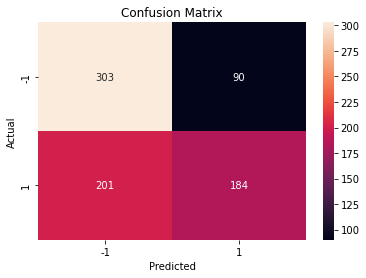

In [5]:
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True, 
    xticklabels=[-1,1], 
    yticklabels=[-1,1],
    fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")